# Project 2

## GENERAL INSTRUCTIONS:

**this is NOT a group project**
- **CLEARLY** mark where you are answering each question (all written questions must be answered in Markdown cells, NOT as comments in code cells)
- Show all code necessary for the analysis, but remove superfluous code

---


# DONUTS

Using the dataset [*krispykreme.csv*](https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KrispyKreme.csv),

- **a)** make 3 scatterplots using ggplot to show:
    - `Sodium_100g` vs `Total_Fat_100g`
    - `Sodium_100g` vs. `Sugar_100g`
    - `Sugar_100g` vs `Total_Fat_100g`
    
    
    
- **b)** Using the scatterplots from part **a** as well as the donuts dataset, **thouroughly discuss which clustering method** (KMeans, Gaussian Mixture Models (EM), Hierarchical Clustering, or DBSCAN) **you think would be best for this data and WHY**. Be sure to include discussions of assumptions each algorithm does/does not make, and what types of data they are good/bad for (**mention each of the 4 algorithms at least once**). (*IN A MARKDOWN CELL*)

Please note that for this assignment, "It's easier to code" or "it's comuptationally efficient" does not count as a valid reason. The reasons should be based on the algorithms/data.


(Please use "\*\*" to make any mention of one of the algorithms bold in your discussion. For example "I think \*\*DBSCAN\*\* is the best algorithm ever!" will make the word "DBSCAN" bold in a Markdown cell).

- **c)** **Implement the algorithm** you think will work best here using the 3 variables `Sodium_100g`, `Total_Fat_100g` and `Sugar_100g`, and describe **how you chose any hyperparameters** (such as distance, # of clusters, min_samples, eps, linkage...etc). Make sure to z-score your variables. (*IN A MARKDOWN CELL*)


- **d)** **Thouroughly discuss the performance** of your clustering model. 
    - which metric did you use to asses your model? (*IN A MARKDOWN CELL*)
    - how did your model perform? (*IN A MARKDOWN CELL*)
    - remake the 3 graphs from part a, but color by cluster assignment. Describe what characterizes each cluster, and give an example of a label for that cluster (e.g. "these donuts are low fat, and low sugar so I would call these healthy donuts") (*IN A MARKDOWN CELL*)


- **e)** Choose ONE other of the `_100g` variables from the data set to **add to your clustering model** to improve it.
    - explain why you chose this variable. (*IN A MARKDOWN CELL*)
    - make a new model, identical to the model in part c, but also including your new variable.
    - did this variable improve the fit of your clustering model? How can you tell? (*IN A MARKDOWN CELL*)
    
    
    
Note: The columns with `_100g` at the end represent the amount of that nutrient per 100 grams of the food. For example, `Total_Fat` tells you the total amount of fat in that food, whereas `Total_Fat_100g` tells you how much fat there is per 100 grams of that food.

In [1]:
# import necessary packages
# import necessary packages
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score


from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt

%matplotlib inline 

In [2]:
# importing data
KrispyKremeDF = pd.read_csv("/Users/iman/CPSC_Courses/CPSC392ParlettPelleriti/Data/KrispyKreme.csv")
KrispyKremeDF.head()

,Restaurant_Item_Name,restaurant,Restaurant_ID,Item_Name,Item_Description,Food_Category,Serving_Size,Serving_Size_text,Serving_Size_Unit,Serving_Size_household,...,Total_Fat_100g,Saturated_Fat_100g,Trans_Fat_100g,Cholesterol_100g,Sodium_100g,Potassium_100g,Carbohydrates_100g,Protein_100g,Sugar_100g,Dietary_Fiber_100g
0,Krispy Kreme Apple Fritter,Krispy Kreme,49,Apple Fritter,"Apple Fritter, Doughnuts",Baked Goods,100,NaN,g,NaN,...,19,9,0,0,110,45.0,42,4,26,1.0
1,Krispy Kreme Chocolate Iced Cake Doughnut,Krispy Kreme,49,Chocolate Iced Cake Doughnut,"Chocolate Iced Cake Doughnut, Doughnuts",Baked Goods,71,NaN,g,NaN,...,18,7,0,35,437,49.0,52,4,27,NaN
2,Krispy Kreme Chocolate Iced Custard Filled Dou...,Krispy Kreme,49,Chocolate Iced Custard Filled Doughnut,"Chocolate Iced Custard Filled Doughnut, Doughnuts",Baked Goods,85,NaN,g,NaN,...,18,8,0,0,165,59.0,44,5,20,1.0
3,Krispy Kreme Chocolate Iced Glazed Doughnut,Krispy Kreme,49,Chocolate Iced Glazed Doughnut,"Chocolate Iced Glazed Doughnut, Doughnuts",Baked Goods,63,NaN,g,NaN,...,17,8,0,0,143,56.0,52,5,32,NaN
4,Krispy Kreme Chocolate Iced Glazed Cruller Dou...,Krispy Kreme,49,Chocolate Iced Glazed Cruller Doughnut,"Chocolate Iced Glazed Cruller Doughnut, Doughnuts",Baked Goods,70,NaN,g,NaN,...,14,6,0,29,386,29.0,57,4,37,NaN


## A) Make 3 scatterplots using ggplot to show:
- `Sodium_100g` vs `Total_Fat_100g`
- `Sodium_100g` vs. `Sugar_100g`
- `Sugar_100g` vs `Total_Fat_100g`

In [3]:
z = StandardScaler()

contVals = ['Calories_100g','Total_Fat_100g','Saturated_Fat_100g','Trans_Fat_100g','Cholesterol_100g',
       'Sodium_100g','Potassium_100g','Carbohydrates_100g','Protein_100g','Sugar_100g',
       'Dietary_Fiber_100g']

X = KrispyKremeDF[contVals]

# z-scoring continuous variables
zsPred = z.fit_transform(KrispyKremeDF[contVals])

# replacing the previous continuous variables with z-scored data in loan data frame
KrispyKremeDF[contVals] = zsPred

KrispyKremeDF.head()

,Restaurant_Item_Name,restaurant,Restaurant_ID,Item_Name,Item_Description,Food_Category,Serving_Size,Serving_Size_text,Serving_Size_Unit,Serving_Size_household,...,Total_Fat_100g,Saturated_Fat_100g,Trans_Fat_100g,Cholesterol_100g,Sodium_100g,Potassium_100g,Carbohydrates_100g,Protein_100g,Sugar_100g,Dietary_Fiber_100g
0,Krispy Kreme Apple Fritter,Krispy Kreme,49,Apple Fritter,"Apple Fritter, Doughnuts",Baked Goods,100,NaN,g,NaN,...,1.496117,1.561170,-0.070014,-0.646999,0.247520,-0.612807,1.223683,0.705159,1.354003,0.79666
1,Krispy Kreme Chocolate Iced Cake Doughnut,Krispy Kreme,49,Chocolate Iced Cake Doughnut,"Chocolate Iced Cake Doughnut, Doughnuts",Baked Goods,71,NaN,g,NaN,...,1.380117,1.040780,-0.070014,3.851274,3.396008,-0.503677,1.787023,0.705159,1.462386,NaN
2,Krispy Kreme Chocolate Iced Custard Filled Dou...,Krispy Kreme,49,Chocolate Iced Custard Filled Doughnut,"Chocolate Iced Custard Filled Doughnut, Doughnuts",Baked Goods,85,NaN,g,NaN,...,1.380117,1.300975,-0.070014,-0.646999,0.777083,-0.230852,1.336351,1.310002,0.703701,0.79666
3,Krispy Kreme Chocolate Iced Glazed Doughnut,Krispy Kreme,49,Chocolate Iced Glazed Doughnut,"Chocolate Iced Glazed Doughnut, Doughnuts",Baked Goods,63,NaN,g,NaN,...,1.264117,1.300975,-0.070014,-0.646999,0.565258,-0.312700,1.787023,1.310002,2.004305,NaN
4,Krispy Kreme Chocolate Iced Glazed Cruller Dou...,Krispy Kreme,49,Chocolate Iced Glazed Cruller Doughnut,"Chocolate Iced Glazed Cruller Doughnut, Doughnuts",Baked Goods,70,NaN,g,NaN,...,0.916117,0.780585,-0.070014,3.080141,2.904959,-1.049328,2.068693,0.705159,2.546223,NaN


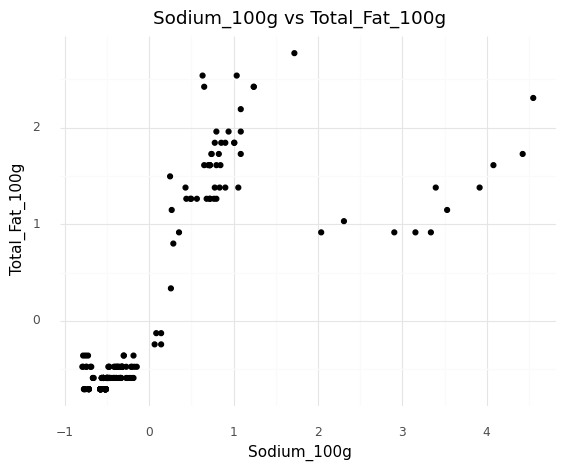

<ggplot: (8783053266157)>

In [4]:
# and use plotnine/ggplot to make a scatterplot of the data 
(ggplot(KrispyKremeDF, aes("Sodium_100g","Total_Fat_100g")) + geom_point() + theme_minimal() + theme(legend_position = "none") + 
labs(title = "Sodium_100g vs Total_Fat_100g"))

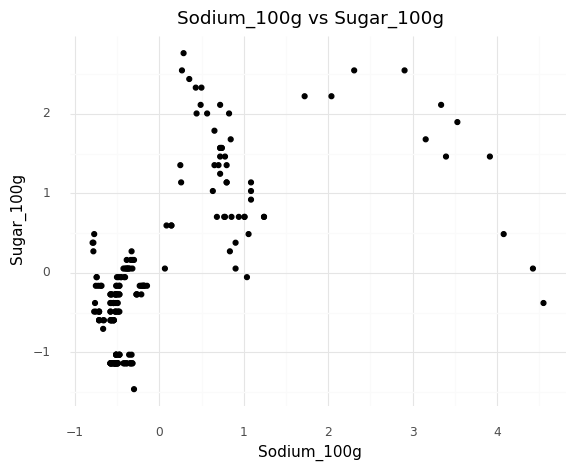

<ggplot: (8783057170161)>

In [5]:
# and use plotnine/ggplot to make a scatterplot of the data 
(ggplot(KrispyKremeDF, aes("Sodium_100g","Sugar_100g")) + geom_point() + theme_minimal() + theme(legend_position = "none") +
labs(title = "Sodium_100g vs Sugar_100g"))

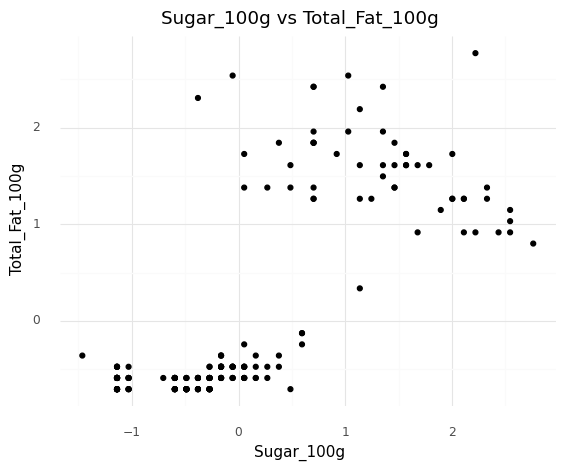

<ggplot: (8783057397881)>

In [6]:
# and use plotnine/ggplot to make a scatterplot of the data 
(ggplot(KrispyKremeDF, aes("Sugar_100g","Total_Fat_100g")) + geom_point() + theme_minimal() + theme(legend_position = "none") + 
labs(title = "Sugar_100g vs Total_Fat_100g"))

## B) Using the scatterplots from part **a** as well as the donuts dataset, **thouroughly discuss which clustering method** (KMeans, Gaussian Mixture Models (EM), Hierarchical Clustering, or DBSCAN) **you think would be best for this data and WHY**. Be sure to include discussions of assumptions each algorithm does/does not make, and what types of data they are good/bad for (**mention each of the 4 algorithms at least once**).

Looking at all 3 graphs, there seems to be about 3-4 clusters. The patterns I see are that there seems to be about 2 desnse clusters and 1 to 2 sparse clusters across all of the graphs. 

Before testing the performance for all 4 clustering methods, I think that best method for this data will most liekely be **Gaussian Mixture Models** because each cluster varies in density and variabilty and there is no weird/distinct shape each cluster takes on. Because **Gaussian Mixture Models** assumes oblong/elliptical clusters, giving each data point soft assignments (using probilities to recalculate the means and variance until distributions converge), **Gaussian Mixture Models** would be able to cluster the graphs using these assumptions. Although the clusters vary in densities, **Gaussian Mixture Models** would be able to use soft/probabilistic assignments to assign each data point a probability of being assigned to each cluster.

Now we will test how well each model does on the dataset.

## **Gaussian Mixture Models (EM)**

In [10]:
threeContVals = ['Total_Fat_100g','Sodium_100g','Sugar_100g']
X1 = KrispyKremeDF[threeContVals]
X1.head()

,Total_Fat_100g,Sodium_100g,Sugar_100g
0,1.496117,0.247520,1.354003
1,1.380117,3.396008,1.462386
2,1.380117,0.777083,0.703701
3,1.264117,0.565258,2.004305
4,0.916117,2.904959,2.546223


In [11]:
GMXdf = X1
GMSils = []
for n in range(2,5):
    gm = GaussianMixture(n_components = n)
    gm.fit(X1)
    colName = str(n) + "_assign"
    GMclusters = gm.predict(X1)
    GMXdf[colName] = GMclusters
    print("Gaussian Mixture SILHOUETTE ", n, ": ", silhouette_score(X1, GMclusters))
    GMSils.append(silhouette_score(X1, GMclusters))

GMnum = np.argmax(GMSils) + 2
finalGM = GaussianMixture(n_components = GMnum)
finalGM.fit(X1)
print("Gaussian Mixture SILHOUETTE: ", silhouette_score(X1, GMclusters))
GMclusters

Gaussian Mixture SILHOUETTE  2 :  0.7481864593509217
Gaussian Mixture SILHOUETTE  3 :  0.756106043547516
Gaussian Mixture SILHOUETTE  4 :  0.8155738411764422
Gaussian Mixture SILHOUETTE:  0.8155738411764422


array([1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 3, 1, 3,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 1, 3, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2])

In [12]:
GMXdf.head()

,Total_Fat_100g,Sodium_100g,Sugar_100g,2_assign,3_assign,4_assign
0,1.496117,0.247520,1.354003,0,1,1
1,1.380117,3.396008,1.462386,0,1,3
2,1.380117,0.777083,0.703701,0,1,1
3,1.264117,0.565258,2.004305,0,1,1
4,0.916117,2.904959,2.546223,0,1,3


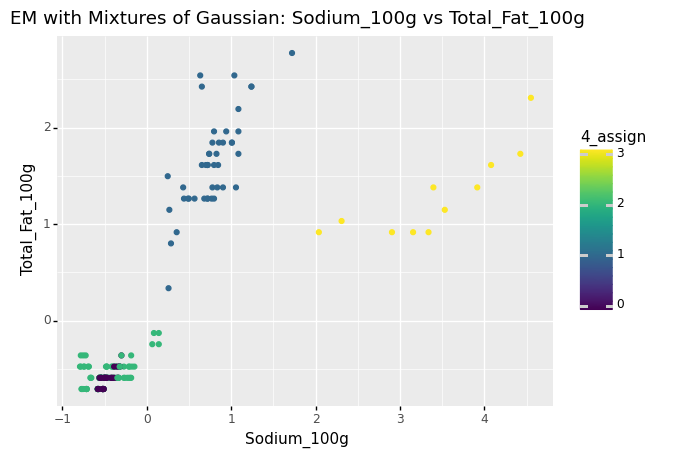

<ggplot: (8783057575273)>

In [13]:
cluster_col = str(GMnum) + "_assign"
(ggplot(GMXdf, aes(x = "Sodium_100g", y = "Total_Fat_100g", color = cluster_col)) + geom_point() + 
labs(title = "EM with Mixtures of Gaussian: Sodium_100g vs Total_Fat_100g"))


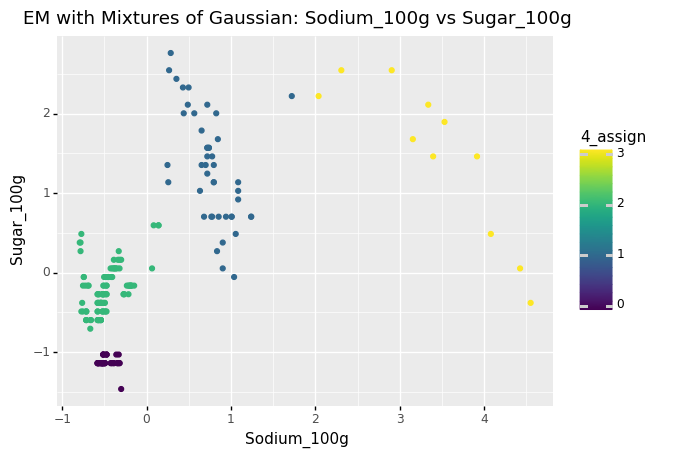

<ggplot: (8783057395717)>

In [14]:
(ggplot(GMXdf, aes(x = "Sodium_100g", y = "Sugar_100g", color = cluster_col)) + geom_point() + 
labs(title = "EM with Mixtures of Gaussian: Sodium_100g vs Sugar_100g"))

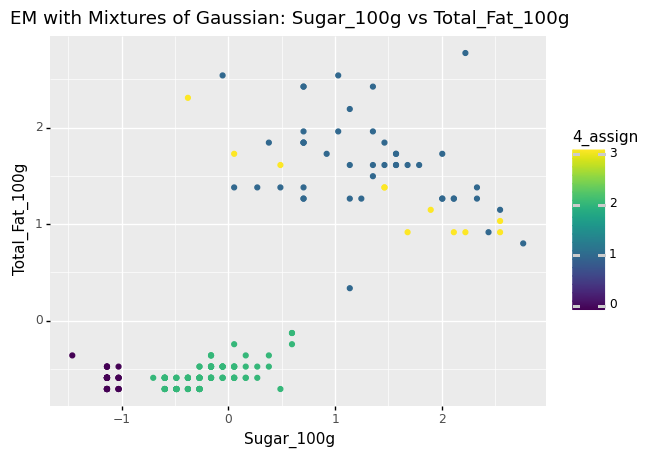

<ggplot: (8783057184909)>

In [15]:
(ggplot(GMXdf, aes(x = "Sugar_100g", y = "Total_Fat_100g", color = cluster_col)) + geom_point() + 
labs(title = "EM with Mixtures of Gaussian: Sugar_100g vs Total_Fat_100g"))

The pros of using **Gaussian Mixture Models (with EM)** with these patterns in the scatterplots is that it will use soft assignments for each of the data points, meaning that it assigns each data point a probability of being assigned to each cluster. In this case, this would be beneficial because there are some clusters that seem to be part of a specific cluster because they have high cohesion (meaning the data points are similar/close to their cluster members) and have high separation (meaning the clusters are different from other clusters depending on distance). However, there are also clusters that have more of a spread so using probabilistic assignments would help assign the data points in the clusters it is proabable to be in. Since **Gaussian Mixture Models (with EM)** also assumes that the clusters are elliptical, it is a great assumption to use for these graphs because these clusters are not too weirdly shaped to be idendified by **Gaussian Mixture Models (with EM)** and are oblong enough to be classified inot groups by **Gaussian Mixture Models (with EM)**.

The cons of using **Gaussian Mixture Models (with EM)** with these patterns in the scatterplots, similar to **k means**, is that it will not be able to cluster noise properly. So data points that do not need to be clustered or are outliers will be forced into some type of cluster when using **Gaussian Mixture Models (with EM)** by grouping it into whichever cluster it has a higher probability of being in.

As we can see by the sillhouette score, the model did quite well with a score of 0.8155738411764422.

## **Hierarchical Clustering**

In [16]:
X2 = KrispyKremeDF[threeContVals]
X2.head()

,Total_Fat_100g,Sodium_100g,Sugar_100g
0,1.496117,0.247520,1.354003
1,1.380117,3.396008,1.462386
2,1.380117,0.777083,0.703701
3,1.264117,0.565258,2.004305
4,0.916117,2.904959,2.546223


In [17]:
HACXdf = X2
HACSils = []
for n in range(2,5):
    hac = AgglomerativeClustering(n_clusters = n,
                            affinity = "euclidean",
                            linkage = "ward")
    hac.fit(X2)
    colName = str(n) + "assign"
    membership = hac.labels_
    HACXdf[colName] = membership
    print("HAC SILHOUETTE ", n, ": ", silhouette_score(X2, membership))
    HACSils.append(silhouette_score(X2, membership))

HACNum = np.argmax(HACSils) + 2
finalHAC = AgglomerativeClustering(n_clusters = HACNum,
                            affinity = "euclidean",
                            linkage = "ward")
finalHAC.fit(X2)
print("HAC SILHOUETTE: ", silhouette_score(X2, membership))
membership

HAC SILHOUETTE  2 :  0.7471022512744973
HAC SILHOUETTE  3 :  0.7603261606335758
HAC SILHOUETTE  4 :  0.7855938872271251
HAC SILHOUETTE:  0.7855938872271251


array([0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 2, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1])

In [18]:
HACXdf.head()

,Total_Fat_100g,Sodium_100g,Sugar_100g,2assign,3assign,4assign
0,1.496117,0.247520,1.354003,0,1,0
1,1.380117,3.396008,1.462386,0,2,2
2,1.380117,0.777083,0.703701,0,1,0
3,1.264117,0.565258,2.004305,0,1,0
4,0.916117,2.904959,2.546223,0,2,2


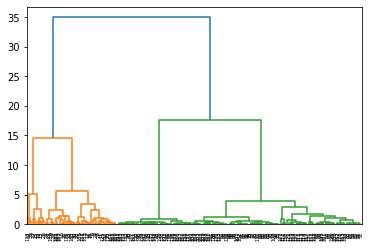

In [19]:
dendro = sch.dendrogram(sch.linkage(HACXdf, method='ward'))

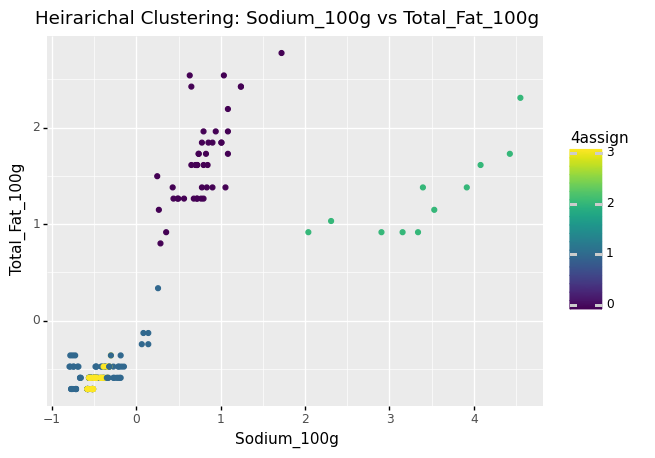

<ggplot: (8783058216185)>

In [20]:
HAC_cluster_col = str(HACNum) + "assign"
(ggplot(HACXdf, aes(x = "Sodium_100g", y = "Total_Fat_100g", color = HAC_cluster_col)) + geom_point() + 
labs(title = "Heirarichal Clustering: Sodium_100g vs Total_Fat_100g"))

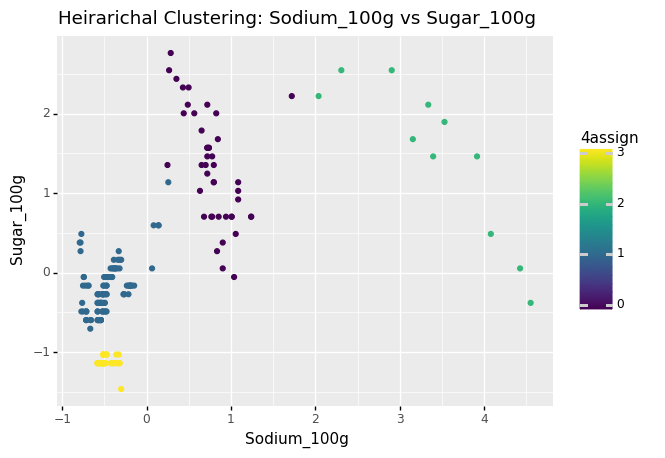

<ggplot: (8783058343209)>

In [21]:
(ggplot(HACXdf, aes(x = "Sodium_100g", y = "Sugar_100g", color = HAC_cluster_col)) + geom_point() + 
labs(title = "Heirarichal Clustering: Sodium_100g vs Sugar_100g"))

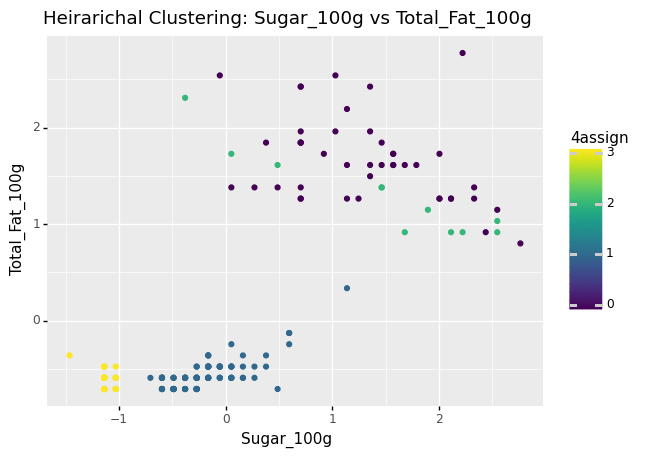

<ggplot: (8783058349049)>

In [22]:
(ggplot(HACXdf, aes(x = "Sugar_100g", y = "Total_Fat_100g", color = HAC_cluster_col)) + geom_point() + 
labs(title = "Heirarichal Clustering: Sugar_100g vs Total_Fat_100g"))

The pros of using **Hierarchical Clustering** with these patterns in the scatterplots would be the flexibility over the number of clusters and the flexibility with the ward linkage. In **Hierarchical Clustering**, you would not need to prespecify the number of clusters since the algorithm clusters the data points/clusters that are closest together and then merge them to create a new cluster. Meaning, it will successively group them together into bigger and bigger groups.

The cons of using **Hierarchical Clustering** with these patterns in the scatterplots are that you cannot unmerge clusters. So if there are clusters that seem like they are not as close as they might be with other clusters but are still classifed in that particular cluster, the algorithm will keep clustering bottom up, possibly resulting in clusters that are not as similar to each other.

As we can see by the sillhouette score, the model did well, but not as well as **Gaussian Mixture Models (with EM)**, with a score of 0.7855938872271251. We can also see that **Hierarchical Clustering** did fairly similar to **Gaussian Mixture Models (with EM)** in clustering when cpmparing the 3 scatterplots.

## **K Means**

In [25]:
X3 = KrispyKremeDF[threeContVals]
X3.head()

,Total_Fat_100g,Sodium_100g,Sugar_100g
0,1.496117,0.247520,1.354003
1,1.380117,3.396008,1.462386
2,1.380117,0.777083,0.703701
3,1.264117,0.565258,2.004305
4,0.916117,2.904959,2.546223


In [26]:
KMXdf = X3
KMSils = []
for n in range(2,5):
    km = KMeans(n_clusters = n)
    km.fit(X3)
    colName = str(n) + "Assign"
    KMclusters = km.predict(X3)
    KMXdf[colName] = KMclusters
    print("K Means SILHOUETTE ", n, ": ", silhouette_score(X3, KMclusters))
    KMSils.append(silhouette_score(X3, membership))

KMNum = np.argmax(KMSils) + 2
KMFinal = KMeans(n_clusters = KMNum)
KMFinal.fit(X3)
print("K Means SILHOUETTE: ", silhouette_score(X3, KMclusters))
KMclusters

K Means SILHOUETTE  2 :  0.7481864593472659
K Means SILHOUETTE  3 :  0.7793756283636831
K Means SILHOUETTE  4 :  0.7930615400402696
K Means SILHOUETTE:  0.7930615400402696


array([0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 2, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [27]:
KMXdf.head()

,Total_Fat_100g,Sodium_100g,Sugar_100g,2Assign,3Assign,4Assign
0,1.496117,0.247520,1.354003,1,2,0
1,1.380117,3.396008,1.462386,1,1,2
2,1.380117,0.777083,0.703701,1,2,0
3,1.264117,0.565258,2.004305,1,2,0
4,0.916117,2.904959,2.546223,1,1,2


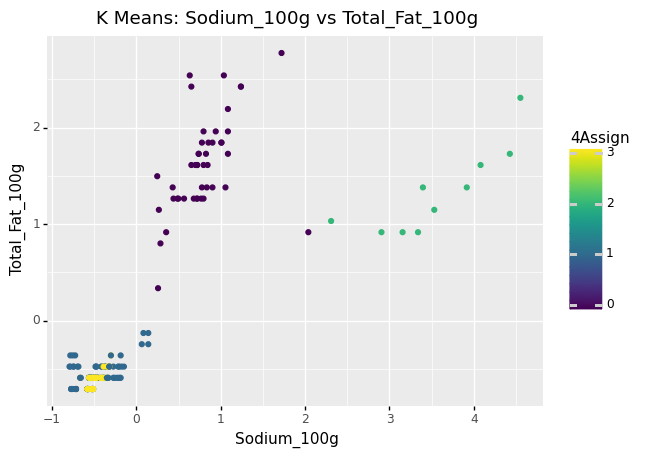

<ggplot: (8783058228573)>

In [28]:
KM_cluster_col = str(KMNum) + "Assign"
(ggplot(KMXdf, aes(x = "Sodium_100g", y = "Total_Fat_100g", color = KM_cluster_col)) + geom_point() + 
labs(title = "K Means: Sodium_100g vs Total_Fat_100g"))

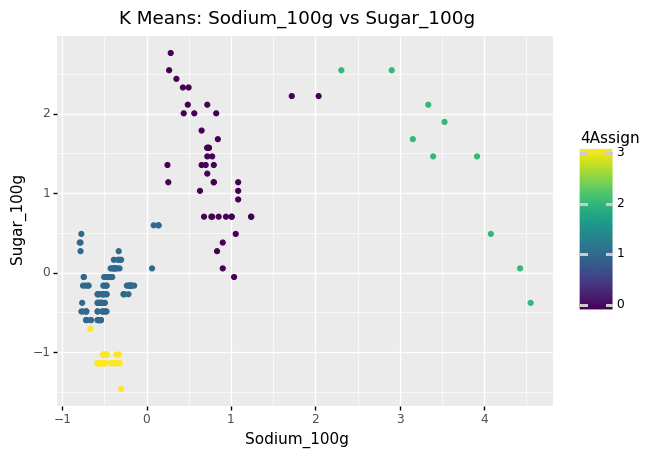

<ggplot: (8783056056141)>

In [29]:
(ggplot(KMXdf, aes(x = "Sodium_100g", y = "Sugar_100g", color = KM_cluster_col)) + geom_point() + 
labs(title = "K Means: Sodium_100g vs Sugar_100g"))

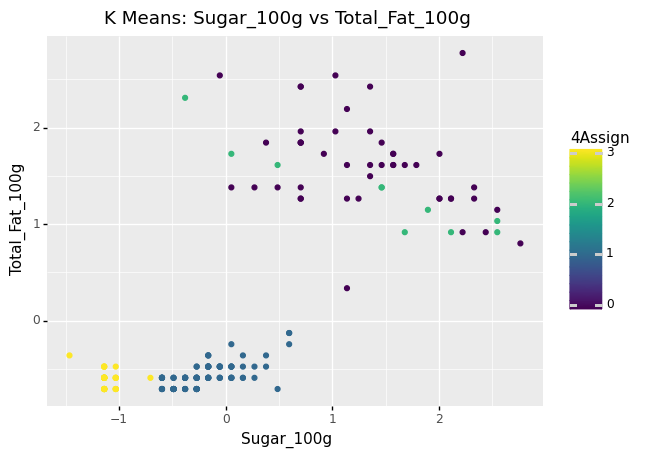

<ggplot: (8783058090641)>

In [30]:
(ggplot(KMXdf, aes(x = "Sugar_100g", y = "Total_Fat_100g", color = KM_cluster_col)) + geom_point() + 
labs(title = "K Means: Sugar_100g vs Total_Fat_100g"))

The pros of using **K Means** with these patterns in the scatterplots would be that because of the spherical assumption, it would be able to capture 1 of the denser clusters quite well. **K Means** also works well on large data sets, so it's great for this specific problem.

The cons of using **K Means** with these patterns in the scatterplots are that it cannot identify noise very well, just like **Gaussian Mixture Models (with EM)**. Because the algorithm uses hard assignments, it assigns each data point to a particular cluster. So, it just groups the data points into the cluster it is closest to. Another con is that since **K Means** assumes spherical clusters, it might miss some of the patterns that exist within clusters. This problem arises because of the fact **K Means** assumes all variance is the same in every direction.

As we can see by the sillhouette score, the model did similar to **Gaussian Mixture Models (with EM)** with a score of 0.7930615400402696. However, we can see by looking at the graphs that **K Means** did not do as well as **Gaussian Mixture Models (with EM)** in clustering because since **K Means** assumes the clusters to be spherical, it does not have as much flexibility with the shape of clustering. So, like we can see with all 3 scatterplots, one or two data points are clustered in a cluster when it clearly looks like it should be clustered in its neighboring cluster. For example in the Sugar_100g vs Total_Fat_100g graph, the cluster with the least amount of total fat and sugar custers 1 data point that seems like it should be grouped with the cluster tha has low total fat but more more grams of sugar.

## **DBSCAN**

In [136]:
X4 = KrispyKremeDF[threeContVals]
X4.head()

,Total_Fat_100g,Sodium_100g,Sugar_100g
0,1.496117,0.247520,1.354003
1,1.380117,3.396008,1.462386
2,1.380117,0.777083,0.703701
3,1.264117,0.565258,2.004305
4,0.916117,2.904959,2.546223


In [142]:
# we ask for mins + 1 nearest, because the data point it self (distance = 0) is included
mins = 3
nn = NearestNeighbors(n_neighbors = mins + 1)
nn.fit(X4)
distances, neighbors = nn.kneighbors(X4)

In [97]:
# sort the distances
distances = np.sort(distances[:, mins], axis = 0)

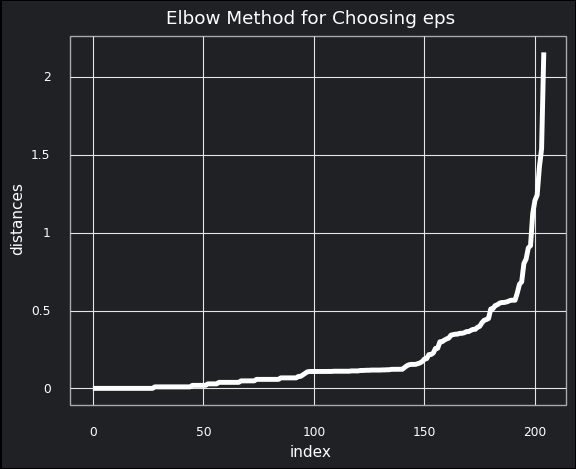

<ggplot: (8783058707865)>

In [98]:
#plot the distances
distances_df = pd.DataFrame({"distances": distances,
                        "index": list(range(0,len(distances)))})
plt = (ggplot(distances_df, aes(x = "index", y = "distances")) +
geom_line(color = "white", size = 2) + theme_minimal() +
labs(title = "Elbow Method for Choosing eps") +
theme(panel_grid_minor = element_blank(),
        rect = element_rect(fill = "#202124ff"),
        axis_text = element_text(color = "white"),
        axis_title = element_text(color = "white"),
        plot_title = element_text(color = "white"),
        panel_border = element_line(color = "darkgray"),
        plot_background = element_rect(fill = "#202124ff")
))
# ggsave(plot=plt, filename='elbow.png', dpi=300)

plt

# inflection point: 0.55

In [146]:
DBSCANXdf = X4

dbscan = DBSCAN(eps = 0.55, min_samples = 10).fit(DBSCANXdf)
labsList = ["Noise"]
labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(dbscan.labels_)))]
DBSCANXdf["assignments"] = dbscan.labels_

# grab only clustered data points
d_clustered = DBSCANXdf.loc[(DBSCANXdf.assignments >= 0)]

#silhouette scores
print("DBSCAN SILHOUETTE: ", silhouette_score(d_clustered[threeContVals], d_clustered["assignments"]))


DBSCAN SILHOUETTE:  0.794220597810109


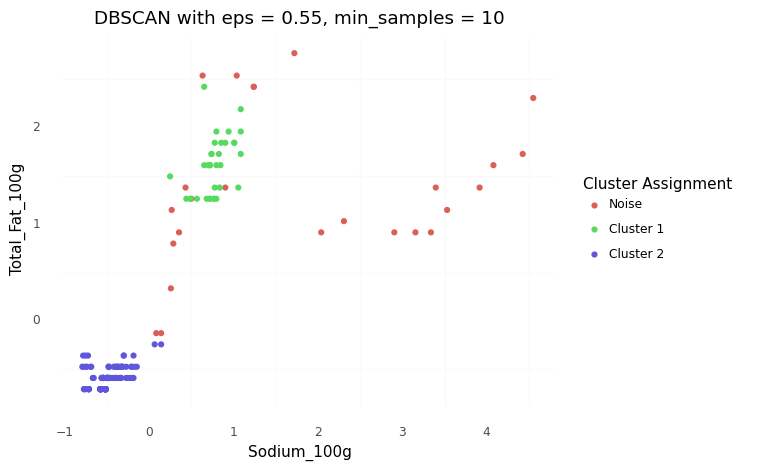

<ggplot: (8783061548889)>

In [138]:
(ggplot(DBSCANXdf, aes(x = "Sodium_100g", y = "Total_Fat_100g", color = "factor(assignments)")) +
geom_point() +
theme_minimal() +
scale_color_discrete(name = "Cluster Assignment",
                    labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "DBSCAN with eps = 0.55, min_samples = 10"))

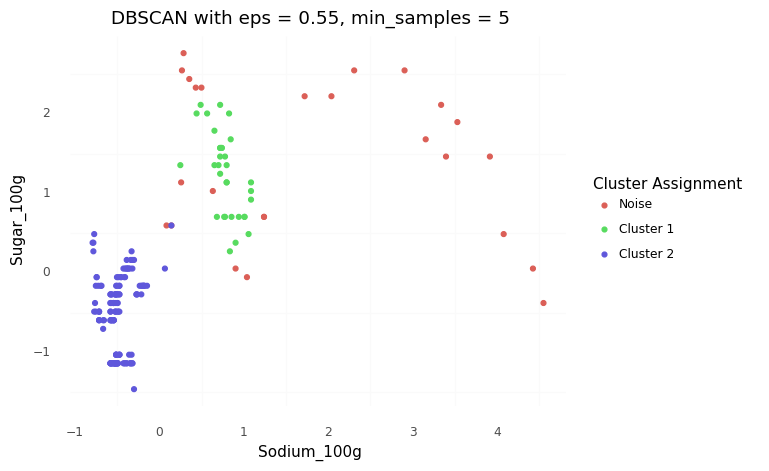

<ggplot: (8783058352349)>

In [121]:
(ggplot(DBSCANXdf, aes(x = "Sodium_100g", y = "Sugar_100g", color = "factor(assignments)")) +
geom_point() +
theme_minimal() +
scale_color_discrete(name = "Cluster Assignment",
                    labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "DBSCAN with eps = 0.55, min_samples = 5"))

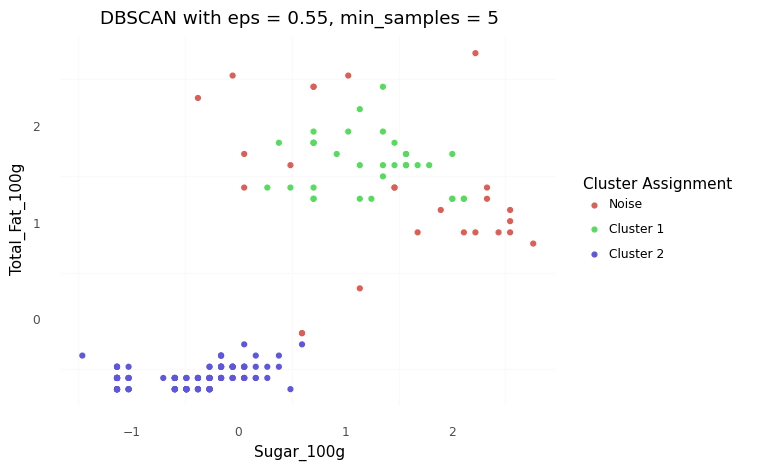

<ggplot: (8783055920413)>

In [123]:
(ggplot(DBSCANXdf, aes(x = "Sugar_100g", y = "Total_Fat_100g", color = "factor(assignments)")) +
geom_point() +
theme_minimal() +
scale_color_discrete(name = "Cluster Assignment",
                    labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "DBSCAN with eps = 0.55, min_samples = 5"))

The pros of using **DBSCAN** with these patterns in the scatterplots are that **DBSCAN** does not make assumptions about the clusters' shape. It is just based on neighbors and epsilon (which can be determined through something like the elbow method). This is can be helpful because it would be able to pick up and distinguish noise from the cluster very well. 

The cons of using **DBSCAN** with these patterns in the scatterplots would be that it does not perform well when there are varying densities. Although it is good at handling clusters of different shapes and sizes, each cluster has varying densities. Looking at each scatterplot, there are some clusters that seem more sparse and other clusters that are more dense. Another con is that **DBSCAN** does not work well when there are overlapping or touching clusters which could possibly happen with the very sparse clusters on the top as seen in the Sodium_100g vs Sugar_100g graph and the Sugar_100g vs Total_Fat_100g graph.

As we can see by the sillhouette score, the model did well, about the same as **K Means**, with a score of 0.794220597810109. Looking at the scatterplots, however, we can see that **DBSCAN** does not do great with overlapping/touching clusters and is suboptimal when clusters have different densities. It either puts all of the data points in one cluster or classifies many of the points as noise when they should be assigned to a cluster. This is because the minpoints (minpts) and epsilon (eps) are chosen for the entire algorithm, so it doesn’t do a great job when the density of the different clusters are different.

## C) **Implement the algorithm** you think will work best here using the 3 variables `Sodium_100g`, `Total_Fat_100g` and `Sugar_100g`, and describe **how you chose any hyperparameters** (such as distance, # of clusters, min_samples, eps, linkage...etc). Make sure to z-score your variables. 

## **Using Gaussian Mixture Models (EM)**

In [139]:
X5 = KrispyKremeDF[threeContVals]
X5.head()

,Total_Fat_100g,Sodium_100g,Sugar_100g
0,1.496117,0.247520,1.354003
1,1.380117,3.396008,1.462386
2,1.380117,0.777083,0.703701
3,1.264117,0.565258,2.004305
4,0.916117,2.904959,2.546223


In [141]:
new_GMXdf = X5
new_GMSils = []
for n in range(2,5):
    gm = GaussianMixture(n_components = n)
    gm.fit(X5)
    colName = str(n) + "_assign"
    new_clusters = gm.predict(X5)
    new_GMXdf[colName] = new_clusters
    print("Gaussian Mixture SILHOUETTE ", n, ": ", silhouette_score(X5, new_clusters))
    new_GMSils.append(silhouette_score(X5, new_clusters))

new_GMnum = np.argmax(new_GMSils) + 2
new_finalGM = GaussianMixture(n_components = new_GMnum)
new_finalGM.fit(X5)
print("Gaussian Mixture SILHOUETTE: ", silhouette_score(X5, new_clusters))
new_clusters

Gaussian Mixture SILHOUETTE  2 :  0.4318931361908979
Gaussian Mixture SILHOUETTE  3 :  0.777235205344554
Gaussian Mixture SILHOUETTE  4 :  0.7994369770249307
Gaussian Mixture SILHOUETTE:  0.7994369770249307


array([1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 3, 1, 3,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 1, 3, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2])

Describe **how you chose any hyperparameters** (such as distance, # of clusters, min_samples, eps, linkage...etc).

Because in **Gaussian Mixture Models (EM)** takes in an argument of how many clssuters we want to make (n_components), I created a for loop that would range from 2 to 4 clusters, calculating how many clusters/components would give the model the best performance. To calculate the performance, I calculated the silhouette score for each number of n_components we are testing on. In this case, when n_components is 4 is when the model performs the best because this produced the highest silhouette score of 0.7994369770249307. 

## D) **Thouroughly discuss the performance** of your clustering model. 
- Which metric did you use to asses your model? (*IN A MARKDOWN CELL*)
- How did your model perform? (*IN A MARKDOWN CELL*)
- Remake the 3 graphs from part a, but color by cluster assignment. Describe what characterizes each cluster, and give an example of a label for that cluster (e.g. "these donuts are low fat, and low sugar so I would call these healthy donuts") (*IN A MARKDOWN CELL*)

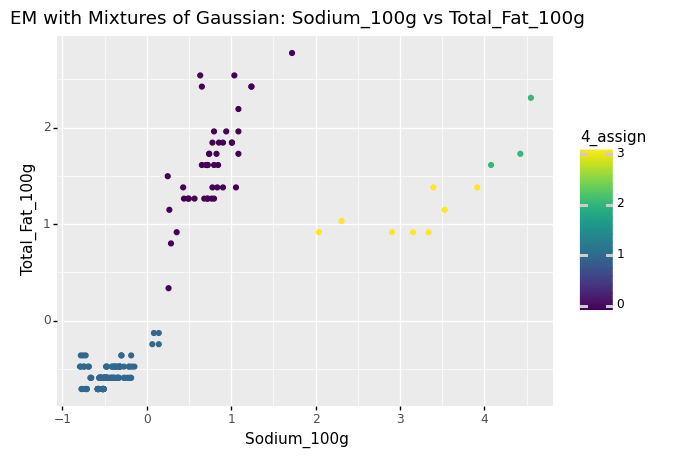

<ggplot: (8783060309281)>

In [80]:
cluster_col = str(GMnum) + "_assign"
(ggplot(new_GMXdf, aes(x = "Sodium_100g", y = "Total_Fat_100g", color = cluster_col)) + geom_point() + 
labs(title = "EM with Mixtures of Gaussian: Sodium_100g vs Total_Fat_100g"))

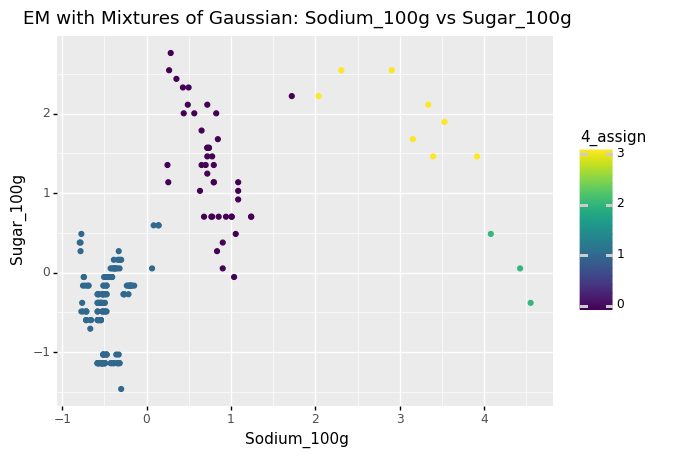

<ggplot: (8783058323653)>

In [81]:
(ggplot(new_GMXdf, aes(x = "Sodium_100g", y = "Sugar_100g", color = cluster_col)) + geom_point() + 
labs(title = "EM with Mixtures of Gaussian: Sodium_100g vs Sugar_100g"))

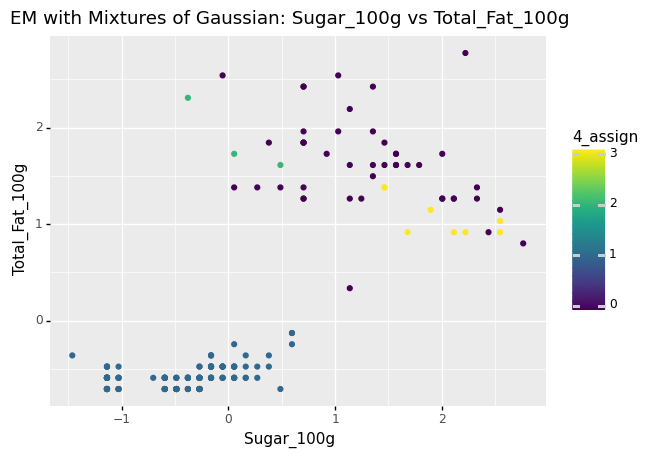

<ggplot: (8783060952905)>

In [83]:
(ggplot(new_GMXdf, aes(x = "Sugar_100g", y = "Total_Fat_100g", color = cluster_col)) + geom_point() + 
labs(title = "EM with Mixtures of Gaussian: Sugar_100g vs Total_Fat_100g"))

Which metric did you use to asses your model? 
- I used a silhouette score to assess the performance of the model. Silhouette scores measure both cohesion and separation and range between -1 to 1. The closer to 1 it is, the better cohesion and seperation it has.  

How did your model perform? 
- Since our model's score is about 0.7994369770249307, this means that the clusters the model is making have relatively good cohesion and seperation. Cohesion measures how sililar cluster members are from each other and seperation measures how different clusters are from other clusters, which is why this is a good measure of success for a model.

Remake the 3 graphs from part a, but color by cluster assignment. Describe what characterizes each cluster, and give an example of a label for that cluster (e.g. "these donuts are low fat, and low sugar so I would call these healthy donuts")
- Blue cluster: These donuts have low sugar, low sodium, and low total fat per 100 grams, so they could be considered as the most healthy donuts out of all of the other grouings.
- Purple cluster: These donuts have low sodium, but varied in the amount of sugar and total fat per 100 grams, so they could be considered as still healthier donuts that the yellow and green groupings, but are a little less healthy than the donuts in the blue cluster.
- Yellow cluster: These donuts have high sodium, high sugar and medium amount of total fat per 100 grams, so they could be considered as the more unhealthy donuts out of all the other clusters.
- Green cluster: These donuts have medium sugar, high sodium and high total fat per 100 grams, so they could be considered as unhealthy donuts, but maybe not necessariy as unhealhty as the donuts in the yellow cluster.

## E) Choose ONE other of the `_100g` variables from the data set to **add to your clustering model** to improve it.
- Explain why you chose this variable. (*IN A MARKDOWN CELL*)
- Make a new model, identical to the model in part c, but also including your new variable.
- Did this variable improve the fit of your clustering model? How can you tell? (*IN A MARKDOWN CELL*)

In [88]:
fourContVals = ['Total_Fat_100g','Sodium_100g','Sugar_100g','Calories_100g']
X6 = KrispyKremeDF[fourContVals]
X6.head()

,Total_Fat_100g,Sodium_100g,Sugar_100g,Calories_100g
0,1.496117,0.247520,1.354003,1.348277
1,1.380117,3.396008,1.462386,1.640705
2,1.380117,0.777083,0.703701,1.368216
3,1.264117,0.565258,2.004305,1.554306
4,0.916117,2.904959,2.546223,1.487845


In [90]:
XSixGMXdf = X6
XSixGMSils = []
for n in range(2,5):
    gm = GaussianMixture(n_components = n)
    gm.fit(X6)
    colName = str(n) + "_assign"
    clusters = gm.predict(X6)
    XSixGMXdf[colName] = clusters
    print("Gaussian Mixture SILHOUETTE ", n, ": ", silhouette_score(X6, clusters))
    XSixGMSils.append(silhouette_score(X6, clusters))

XSixGMnum = np.argmax(XSixGMSils) + 2
XSixfinalGM = GaussianMixture(n_components = XSixGMnum)
XSixfinalGM.fit(X6)
print("Gaussian Mixture SILHOUETTE: ", silhouette_score(X6, clusters))
clusters

Gaussian Mixture SILHOUETTE  2 :  0.6728334291710198
Gaussian Mixture SILHOUETTE  3 :  0.7523851705576512
Gaussian Mixture SILHOUETTE  4 :  0.8083132556905994
Gaussian Mixture SILHOUETTE:  0.8083132556905994


array([1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 3, 1, 3,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 3, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

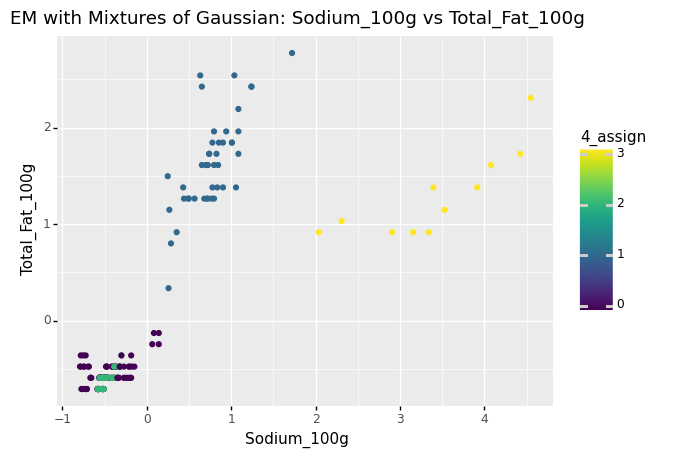

<ggplot: (8783060152773)>

In [92]:
cluster_col = str(GMnum) + "_assign"
(ggplot(XSixGMXdf, aes(x = "Sodium_100g", y = "Total_Fat_100g", color = cluster_col)) + geom_point() + 
labs(title = "EM with Mixtures of Gaussian: Sodium_100g vs Total_Fat_100g"))

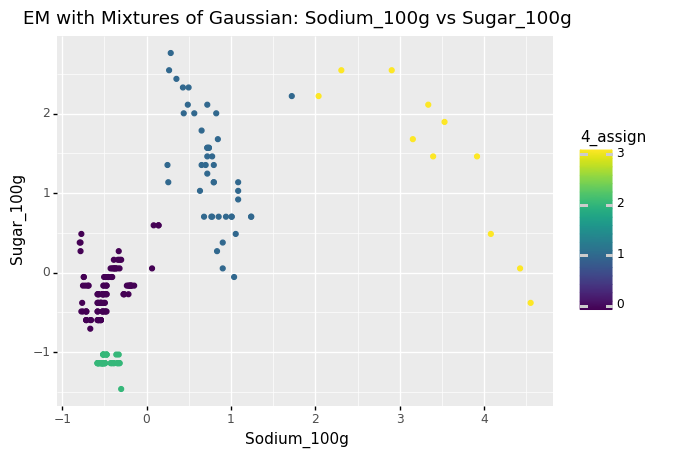

<ggplot: (8783061228169)>

In [93]:
(ggplot(XSixGMXdf, aes(x = "Sodium_100g", y = "Sugar_100g", color = cluster_col)) + geom_point() + 
labs(title = "EM with Mixtures of Gaussian: Sodium_100g vs Sugar_100g"))

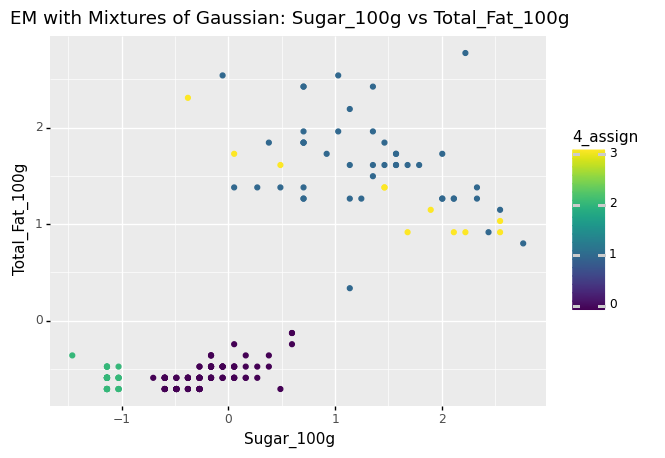

<ggplot: (8783060799241)>

In [94]:
(ggplot(XSixGMXdf, aes(x = "Sugar_100g", y = "Total_Fat_100g", color = cluster_col)) + geom_point() + 
labs(title = "EM with Mixtures of Gaussian: Sugar_100g vs Total_Fat_100g"))

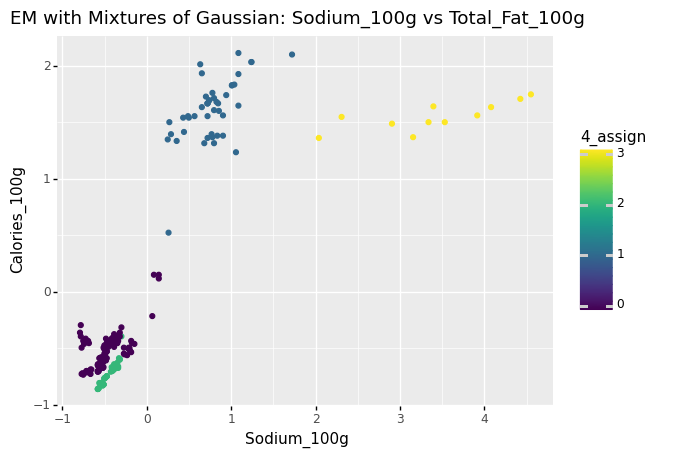

<ggplot: (8783060739765)>

In [143]:
cluster_col = str(GMnum) + "_assign"
(ggplot(XSixGMXdf, aes(x = "Sodium_100g", y = "Calories_100g", color = cluster_col)) + geom_point() + 
labs(title = "EM with Mixtures of Gaussian: Sodium_100g vs Total_Fat_100g"))

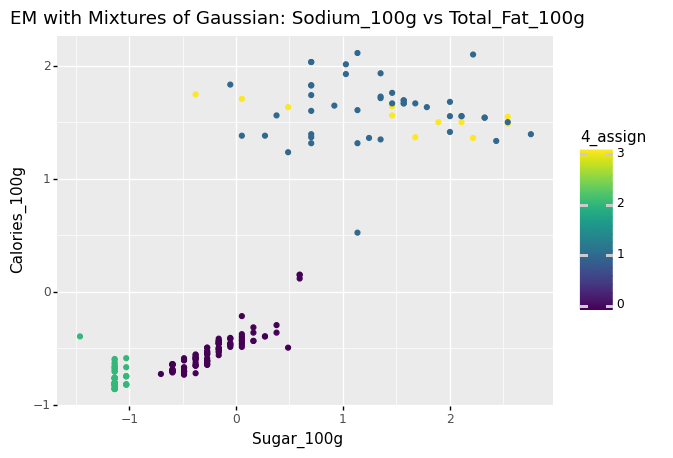

<ggplot: (8783062026605)>

In [144]:
cluster_col = str(GMnum) + "_assign"
(ggplot(XSixGMXdf, aes(x = "Sugar_100g", y = "Calories_100g", color = cluster_col)) + geom_point() + 
labs(title = "EM with Mixtures of Gaussian: Sodium_100g vs Total_Fat_100g"))

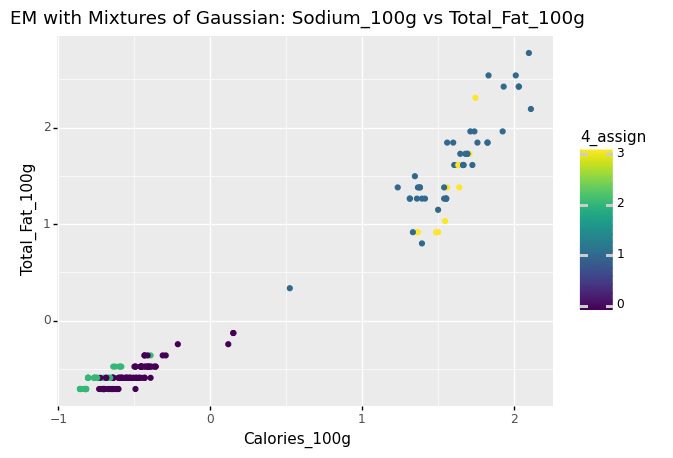

<ggplot: (8783060234853)>

In [145]:
cluster_col = str(GMnum) + "_assign"
(ggplot(XSixGMXdf, aes(x = "Calories_100g", y = "Total_Fat_100g", color = cluster_col)) + geom_point() + 
labs(title = "EM with Mixtures of Gaussian: Sodium_100g vs Total_Fat_100g"))

Explain why you chose this variable. 
- I chose `Calories_100g` to the clustering model because when assessing the performance, adding this variable improved the silhouette score from 0.7994369770249307 to 0.8083132556905994. 

Did this variable improve the fit of your clustering model? How can you tell? 
- Yes, adding `Calories_100g` improved the fit of the clustering model as we can see by the silhouette score. This is because **Gaussian Mixture Models (EM)** does well on high dimensional data. This is because since **Gaussian Mixture Models (EM)** uses probabilistic assignments, it gives the data more felxibility to be categorized in certain clusters depending on how proababe the data point is to being in each cluster.